# Classification of dog breeds using GoogLeNet for ILSVRC '12
The trained NN for the ILSVRC '12 data were obtained at http://dl.caffe.berkeleyvision.org/bvlc_googlenet.caffemodel.
The model is explained at caffe_directory/model/bvlc_googlenet/readme.md. It was trained by Berkeley Vision and Learning Center (BVLC).

Taking the advantage of a already trained network with lots of different breeds of dogs, several dogs images were tested to see how the NN classify non typical dogs. Also, the importance of shape and color pattern were discussed.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Make sure that caffe is on the python path:
caffe_root = '/Users/reneoctavio/caffe/'
import sys
sys.path.insert(0, caffe_root + 'python')

import caffe

# Set the right path to your model definition file, pretrained model weights,
# and the image you would like to classify.
MODEL_FILE  = '/Users/reneoctavio/caffe/models/bvlc_googlenet/deploy.prototxt'
PRETRAINED  = '/Users/reneoctavio/caffe/models/bvlc_googlenet/bvlc_googlenet.caffemodel'
SYNSET_FILE = '/Users/reneoctavio/caffe/data/ilsvrc12/synset_words.txt'

#Read Synset
file = open(SYNSET_FILE, 'r')
dicSyn = {}
i = 0
for line in file:
    ln = line.split()
    dicSyn[i] = ' '.join(ln[1:len(ln)])
    i = i + 1

# Transform mean in protobinary to npy
#!python /Users/reneoctavio/caffe/data/ilsvrc12/convert_protomean.py

In [2]:
caffe.set_mode_cpu()
net = caffe.Classifier(MODEL_FILE, PRETRAINED,
                       mean=np.load(caffe_root + 'data/ilsvrc12/mean.npy').mean(1).mean(1),
                       channel_swap=(2,1,0),
                       raw_scale=255,
                       image_dims=(256, 256))

# Hybrid Dogs
This section show some hybrid dogs, and how the NN identifies them. One can notice that most of the hybrid dogs have a dominant breed and the other breed rarely comes up into the top 10 possible breeds. Shape and color play a large role in the classification. These hybrid dogs are usually classified into breeds they are more similar to, which is not necessarily the breeds in which they were mixed.

Dandie Dinmont, Dandie Dinmont terrier
otterhound, otter hound
Irish wolfhound
Tibetan terrier, chrysanthemum dog
standard schnauzer
Australian terrier
Scottish deerhound, deerhound
Old English sheepdog, bobtail
Tibetan mastiff
miniature schnauzer


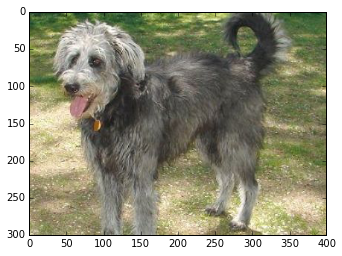

In [160]:
#German Shepherd + Poodle
IMAGE_FILE  = '/Users/reneoctavio/caffe/examples/images/dogs/shepadoodle.jpg'
input_image = caffe.io.load_image(IMAGE_FILE)
plt.imshow(input_image)

#Prediction
prediction = net.predict([input_image])  # predict takes any number of images, and formats them for the Caffe net automatically
#print 'prediction shape:', prediction[0].shape
#plt.plot(prediction[0])
#print 'predicted class:', prediction[0].argmax()

#Top 10 Predicted Classes
pred = prediction[0]
pred = pred.argsort()[-10:][::-1]
for cls in pred:
    print(dicSyn[cls])

Chihuahua
American Staffordshire terrier, Staffordshire terrier, American pit bull terrier, pit bull terrier
Staffordshire bullterrier, Staffordshire bull terrier
French bulldog
Brabancon griffon
bull mastiff
Border terrier
boxer
pug, pug-dog
Norfolk terrier


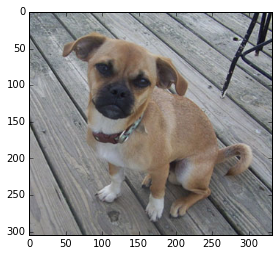

In [118]:
#Chihuahua + Pug
IMAGE_FILE  = '/Users/reneoctavio/caffe/examples/images/dogs/chug.jpg'
input_image = caffe.io.load_image(IMAGE_FILE)
plt.imshow(input_image)

#Prediction
prediction = net.predict([input_image])  # predict takes any number of images, and formats them for the Caffe net automatically
pred = prediction[0]
pred = pred.argsort()[-10:][::-1]
for cls in pred:
    print(dicSyn[cls])

toy poodle
miniature poodle
Tibetan terrier, chrysanthemum dog
Lhasa, Lhasa apso
Maltese dog, Maltese terrier, Maltese
soft-coated wheaten terrier
Lakeland terrier
Norfolk terrier
cocker spaniel, English cocker spaniel, cocker
silky terrier, Sydney silky


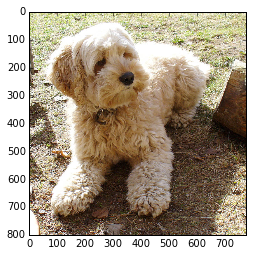

In [119]:
#Cocker Spaniel + Poodle
IMAGE_FILE  = '/Users/reneoctavio/caffe/examples/images/dogs/Cockerpoo.jpg'
input_image = caffe.io.load_image(IMAGE_FILE)
plt.imshow(input_image)

#Prediction
prediction = net.predict([input_image])  # predict takes any number of images, and formats them for the Caffe net automatically
pred = prediction[0]
pred = pred.argsort()[-10:][::-1]
for cls in pred:
    print(dicSyn[cls])

Leonberg
golden retriever
Saint Bernard, St Bernard
Tibetan terrier, chrysanthemum dog
Tibetan mastiff
otterhound, otter hound
collie
Saluki, gazelle hound
malamute, malemute, Alaskan malamute
Afghan hound, Afghan


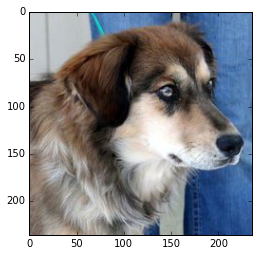

In [133]:
#Golden Retriever + Siberian Husky
IMAGE_FILE  = '/Users/reneoctavio/caffe/examples/images/dogs/goberian.jpg'
input_image = caffe.io.load_image(IMAGE_FILE)
plt.imshow(input_image)

#Prediction
prediction = net.predict([input_image])  # predict takes any number of images, and formats them for the Caffe net automatically
pred = prediction[0]
pred = pred.argsort()[-10:][::-1]
for cls in pred:
    print(dicSyn[cls])

golden retriever
otterhound, otter hound
Tibetan terrier, chrysanthemum dog
soft-coated wheaten terrier
cocker spaniel, English cocker spaniel, cocker
kuvasz
Afghan hound, Afghan
Great Pyrenees
Irish terrier
briard


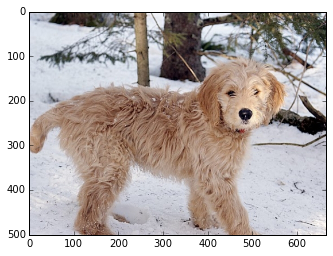

In [122]:
#Golden Retriever + Poodle
IMAGE_FILE  = '/Users/reneoctavio/caffe/examples/images/dogs/goldendoodle.JPG'
input_image = caffe.io.load_image(IMAGE_FILE)
plt.imshow(input_image)

#Prediction
prediction = net.predict([input_image])  # predict takes any number of images, and formats them for the Caffe net automatically
pred = prediction[0]
pred = pred.argsort()[-10:][::-1]
for cls in pred:
    print(dicSyn[cls])

golden retriever
Labrador retriever
Pembroke, Pembroke Welsh corgi
tennis ball
Rhodesian ridgeback
flat-coated retriever
Chesapeake Bay retriever
Brittany spaniel
kelpie
dingo, warrigal, warragal, Canis dingo


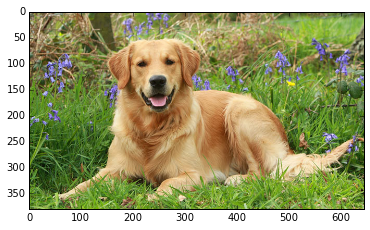

In [123]:
#Golden Retriever
IMAGE_FILE  = '/Users/reneoctavio/caffe/examples/images/dogs/goldenretriever.jpg'
input_image = caffe.io.load_image(IMAGE_FILE)
plt.imshow(input_image)

#Prediction
prediction = net.predict([input_image])  # predict takes any number of images, and formats them for the Caffe net automatically
pred = prediction[0]
pred = pred.argsort()[-10:][::-1]
for cls in pred:
    print(dicSyn[cls])

tennis ball
Labrador retriever
American Staffordshire terrier, Staffordshire terrier, American pit bull terrier, pit bull terrier
Staffordshire bullterrier, Staffordshire bull terrier
soccer ball
Chesapeake Bay retriever
Greater Swiss Mountain dog
Rhodesian ridgeback
golden retriever
bull mastiff


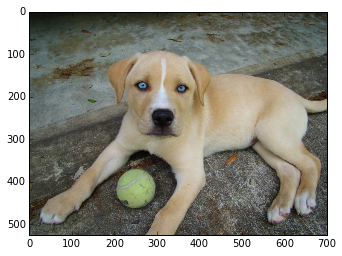

In [124]:
#Labrador + Siberian Husky
IMAGE_FILE  = '/Users/reneoctavio/caffe/examples/images/dogs/labsky.jpg'
input_image = caffe.io.load_image(IMAGE_FILE)
plt.imshow(input_image)

#Prediction
prediction = net.predict([input_image])  # predict takes any number of images, and formats them for the Caffe net automatically
pred = prediction[0]
pred = pred.argsort()[-10:][::-1]
for cls in pred:
    print(dicSyn[cls])

Shih-Tzu
Lhasa, Lhasa apso
Japanese spaniel
Tibetan terrier, chrysanthemum dog
Pekinese, Pekingese, Peke
papillon
Maltese dog, Maltese terrier, Maltese
Blenheim spaniel
affenpinscher, monkey pinscher, monkey dog
Dandie Dinmont, Dandie Dinmont terrier


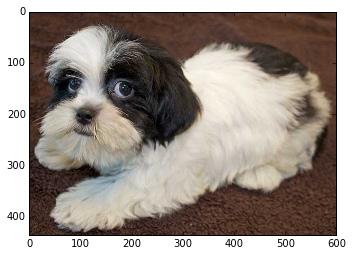

In [126]:
#Maltese + Shih-Tzu
IMAGE_FILE  = '/Users/reneoctavio/caffe/examples/images/dogs/malshi.jpg'
input_image = caffe.io.load_image(IMAGE_FILE)
plt.imshow(input_image)

#Prediction
prediction = net.predict([input_image])  # predict takes any number of images, and formats them for the Caffe net automatically
pred = prediction[0]
pred = pred.argsort()[-10:][::-1]
for cls in pred:
    print(dicSyn[cls])

toy poodle
miniature poodle
Tibetan terrier, chrysanthemum dog
Norfolk terrier
Dandie Dinmont, Dandie Dinmont terrier
Lhasa, Lhasa apso
Maltese dog, Maltese terrier, Maltese
Yorkshire terrier
Norwich terrier
Shih-Tzu


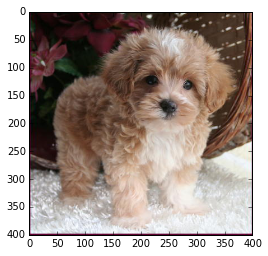

In [127]:
#Maltese + Poodle
IMAGE_FILE  = '/Users/reneoctavio/caffe/examples/images/dogs/maltipoo.jpg'
input_image = caffe.io.load_image(IMAGE_FILE)
plt.imshow(input_image)

#Prediction
prediction = net.predict([input_image])  # predict takes any number of images, and formats them for the Caffe net automatically
pred = prediction[0]
pred = pred.argsort()[-10:][::-1]
for cls in pred:
    print(dicSyn[cls])

Yorkshire terrier
Lakeland terrier
Australian terrier
wire-haired fox terrier
silky terrier, Sydney silky
Dandie Dinmont, Dandie Dinmont terrier
Norfolk terrier
Norwich terrier
miniature schnauzer
standard schnauzer


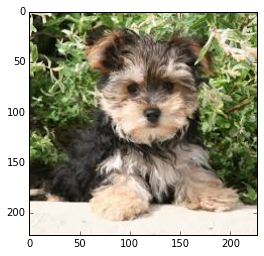

In [128]:
#Maltese + Yorkshire Terrier
IMAGE_FILE  = '/Users/reneoctavio/caffe/examples/images/dogs/morkie.jpeg'
input_image = caffe.io.load_image(IMAGE_FILE)
plt.imshow(input_image)

#Prediction
prediction = net.predict([input_image])  # predict takes any number of images, and formats them for the Caffe net automatically
pred = prediction[0]
pred = pred.argsort()[-10:][::-1]
for cls in pred:
    print(dicSyn[cls])

American Staffordshire terrier, Staffordshire terrier, American pit bull terrier, pit bull terrier
Ibizan hound, Ibizan Podenco
kelpie
Staffordshire bullterrier, Staffordshire bull terrier
basenji
Boston bull, Boston terrier
Chihuahua
Cardigan, Cardigan Welsh corgi
Great Dane
toy terrier


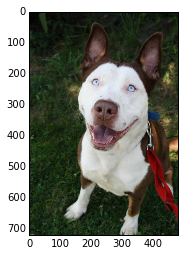

In [129]:
#Pitbull + Siberian Husky
IMAGE_FILE  = '/Users/reneoctavio/caffe/examples/images/dogs/pitsky.jpg'
input_image = caffe.io.load_image(IMAGE_FILE)
plt.imshow(input_image)

#Prediction
prediction = net.predict([input_image])  # predict takes any number of images, and formats them for the Caffe net automatically
pred = prediction[0]
pred = pred.argsort()[-10:][::-1]
for cls in pred:
    print(dicSyn[cls])

toy poodle
miniature poodle
komondor
Maltese dog, Maltese terrier, Maltese
kuvasz
Dandie Dinmont, Dandie Dinmont terrier
standard poodle
soft-coated wheaten terrier
Tibetan terrier, chrysanthemum dog
Sealyham terrier, Sealyham


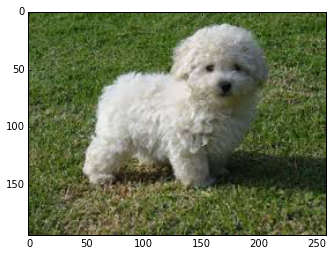

In [130]:
#Poodle
IMAGE_FILE  = '/Users/reneoctavio/caffe/examples/images/dogs/poodle.jpeg'
input_image = caffe.io.load_image(IMAGE_FILE)
plt.imshow(input_image)

#Prediction
prediction = net.predict([input_image])  # predict takes any number of images, and formats them for the Caffe net automatically
pred = prediction[0]
pred = pred.argsort()[-10:][::-1]
for cls in pred:
    print(dicSyn[cls])

Labrador retriever
Rhodesian ridgeback
redbone
golden retriever
bull mastiff
beagle
Chihuahua
bloodhound, sleuthhound
vizsla, Hungarian pointer
American Staffordshire terrier, Staffordshire terrier, American pit bull terrier, pit bull terrier


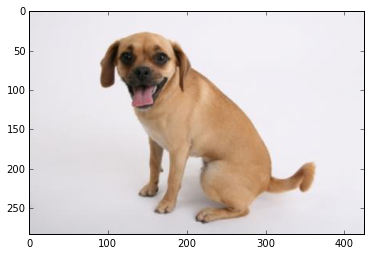

In [131]:
#Beagle + Pug
IMAGE_FILE  = '/Users/reneoctavio/caffe/examples/images/dogs/puggle.jpg'
input_image = caffe.io.load_image(IMAGE_FILE)
plt.imshow(input_image)

#Prediction
prediction = net.predict([input_image])  # predict takes any number of images, and formats them for the Caffe net automatically
pred = prediction[0]
pred = pred.argsort()[-10:][::-1]
for cls in pred:
    print(dicSyn[cls])

Lakeland terrier
Yorkshire terrier
wire-haired fox terrier
Airedale, Airedale terrier
Australian terrier
otterhound, otter hound
Norwich terrier
silky terrier, Sydney silky
Irish terrier
miniature schnauzer


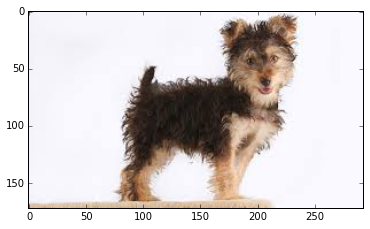

In [132]:
#Yorkshire Terrier + Poodle
IMAGE_FILE  = '/Users/reneoctavio/caffe/examples/images/dogs/yorkipoo.jpeg'
input_image = caffe.io.load_image(IMAGE_FILE)
plt.imshow(input_image)

#Prediction
prediction = net.predict([input_image])  # predict takes any number of images, and formats them for the Caffe net automatically
pred = prediction[0]
pred = pred.argsort()[-10:][::-1]
for cls in pred:
    print(dicSyn[cls])

# The problem lies in the Arctic
The Artic trio of breeds, namely Canadian Eskimo Dog, Siberian Husky and Alaskan Malamute, are usually very similiar and the NN have a hard time classificating them.

Eskimo dog, husky
Siberian husky
malamute, malemute, Alaskan malamute
Norwegian elkhound, elkhound
German shepherd, German shepherd dog, German police dog, alsatian
dogsled, dog sled, dog sleigh
Pembroke, Pembroke Welsh corgi
dingo, warrigal, warragal, Canis dingo
timber wolf, grey wolf, gray wolf, Canis lupus
white wolf, Arctic wolf, Canis lupus tundrarum


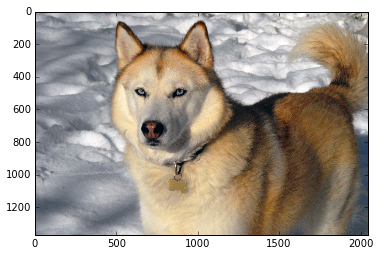

In [134]:
#Brown Siberian Husky
IMAGE_FILE  = '/Users/reneoctavio/caffe/examples/images/dogs/siberianhusky.jpg'
input_image = caffe.io.load_image(IMAGE_FILE)
plt.imshow(input_image)

#Prediction
prediction = net.predict([input_image])  # predict takes any number of images, and formats them for the Caffe net automatically
pred = prediction[0]
pred = pred.argsort()[-10:][::-1]
for cls in pred:
    print(dicSyn[cls])

Eskimo dog, husky
Siberian husky
malamute, malemute, Alaskan malamute
dogsled, dog sled, dog sleigh
kelpie
Border collie
German shepherd, German shepherd dog, German police dog, alsatian
Cardigan, Cardigan Welsh corgi
collie
EntleBucher


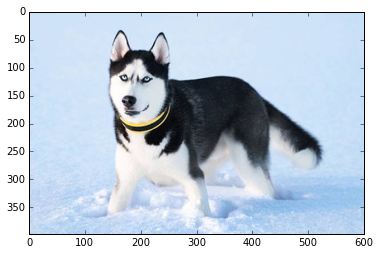

In [162]:
#Classic Siberian Husky
IMAGE_FILE  = '/Users/reneoctavio/caffe/examples/images/dogs/siberianhuskyblack.jpg'
input_image = caffe.io.load_image(IMAGE_FILE)
plt.imshow(input_image)

#Prediction
prediction = net.predict([input_image])  # predict takes any number of images, and formats them for the Caffe net automatically
pred = prediction[0]
pred = pred.argsort()[-10:][::-1]
for cls in pred:
    print(dicSyn[cls])

Eskimo dog, husky
Great Pyrenees
collie
Siberian husky
Samoyed, Samoyede
malamute, malemute, Alaskan malamute
kuvasz
white wolf, Arctic wolf, Canis lupus tundrarum
borzoi, Russian wolfhound
Norwegian elkhound, elkhound


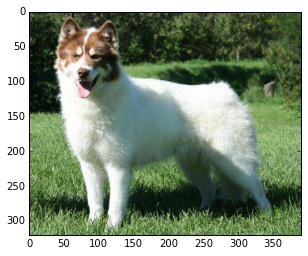

In [163]:
#Canadian Eskimo Dog
IMAGE_FILE  = '/Users/reneoctavio/caffe/examples/images/dogs/canadianeskimo.jpg'
input_image = caffe.io.load_image(IMAGE_FILE)
plt.imshow(input_image)

#Prediction
prediction = net.predict([input_image])  # predict takes any number of images, and formats them for the Caffe net automatically
pred = prediction[0]
pred = pred.argsort()[-10:][::-1]
for cls in pred:
    print(dicSyn[cls])

Siberian husky
Eskimo dog, husky
malamute, malemute, Alaskan malamute
kelpie
Border collie
collie
Pembroke, Pembroke Welsh corgi
Norwegian elkhound, elkhound
timber wolf, grey wolf, gray wolf, Canis lupus
dogsled, dog sled, dog sleigh


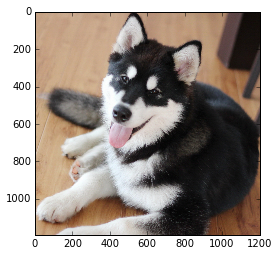

In [165]:
#Alaskan malamute
IMAGE_FILE  = '/Users/reneoctavio/caffe/examples/images/dogs/alaskanmalamute.jpg'
input_image = caffe.io.load_image(IMAGE_FILE)
plt.imshow(input_image)

#Prediction
prediction = net.predict([input_image])  # predict takes any number of images, and formats them for the Caffe net automatically
pred = prediction[0]
pred = pred.argsort()[-10:][::-1]
for cls in pred:
    print(dicSyn[cls])

# The Germans
The NN correctly classifies classic German Shepherds. However, a black German Shepherd was not correct classified, it is probably because of the pose of the dog, because a second black German Shepherd dog in a different pose was correctly classified.

Rottweiler and Dobermann were correctly classified despite having a similar pattern of colors. It is a strong evidence that shape is also important in classification.

German shepherd, German shepherd dog, German police dog, alsatian
Leonberg
malinois
Norwegian elkhound, elkhound
collie
malamute, malemute, Alaskan malamute
Tibetan mastiff
kelpie
muzzle
briard


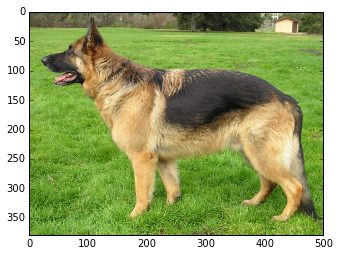

In [138]:
#German Shepherd
IMAGE_FILE  = '/Users/reneoctavio/caffe/examples/images/dogs/germanshepherd.jpg'
input_image = caffe.io.load_image(IMAGE_FILE)
plt.imshow(input_image)

#Prediction
prediction = net.predict([input_image])  # predict takes any number of images, and formats them for the Caffe net automatically
pred = prediction[0]
pred = pred.argsort()[-10:][::-1]
for cls in pred:
    print(dicSyn[cls])

groenendael
schipperke
German shepherd, German shepherd dog, German police dog, alsatian
kelpie
flat-coated retriever
malinois
Norwegian elkhound, elkhound
Newfoundland, Newfoundland dog
Labrador retriever
dingo, warrigal, warragal, Canis dingo


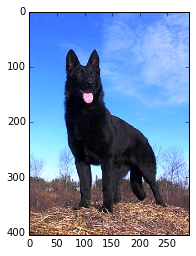

In [137]:
#Black German Shepherd
IMAGE_FILE  = '/Users/reneoctavio/caffe/examples/images/dogs/blackgermanshepherd.jpg'
input_image = caffe.io.load_image(IMAGE_FILE)
plt.imshow(input_image)

#Prediction
prediction = net.predict([input_image])  # predict takes any number of images, and formats them for the Caffe net automatically
pred = prediction[0]
pred = pred.argsort()[-10:][::-1]
for cls in pred:
    print(dicSyn[cls])

German shepherd, German shepherd dog, German police dog, alsatian
groenendael
kelpie
flat-coated retriever
schipperke
malinois
Labrador retriever
curly-coated retriever
Cardigan, Cardigan Welsh corgi
Border collie


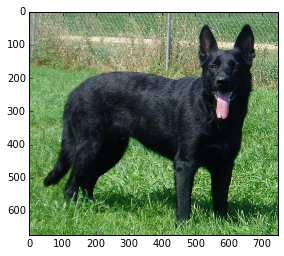

In [167]:
#Black German Shepherd #2
IMAGE_FILE  = '/Users/reneoctavio/caffe/examples/images/dogs/germanshepherdfullblack.jpg'
input_image = caffe.io.load_image(IMAGE_FILE)
plt.imshow(input_image)

#Prediction
prediction = net.predict([input_image])  # predict takes any number of images, and formats them for the Caffe net automatically
pred = prediction[0]
pred = pred.argsort()[-10:][::-1]
for cls in pred:
    print(dicSyn[cls])

Rottweiler
black-and-tan coonhound
Doberman, Doberman pinscher
muzzle
kelpie
Gordon setter
Appenzeller
Tibetan mastiff
Greater Swiss Mountain dog
EntleBucher


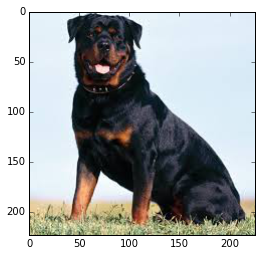

In [140]:
#Rottweiler
IMAGE_FILE  = '/Users/reneoctavio/caffe/examples/images/dogs/rottweiler.jpeg'
input_image = caffe.io.load_image(IMAGE_FILE)
plt.imshow(input_image)

#Prediction
prediction = net.predict([input_image])  # predict takes any number of images, and formats them for the Caffe net automatically
pred = prediction[0]
pred = pred.argsort()[-10:][::-1]
for cls in pred:
    print(dicSyn[cls])

Doberman, Doberman pinscher
Rottweiler
black-and-tan coonhound
Appenzeller
kelpie
miniature pinscher
muzzle
Gordon setter
EntleBucher
Greater Swiss Mountain dog


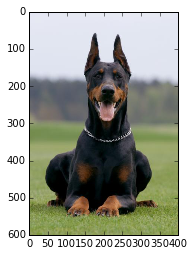

In [166]:
#Dobermann
IMAGE_FILE  = '/Users/reneoctavio/caffe/examples/images/dogs/doberman.jpg'
input_image = caffe.io.load_image(IMAGE_FILE)
plt.imshow(input_image)

#Prediction
prediction = net.predict([input_image])  # predict takes any number of images, and formats them for the Caffe net automatically
pred = prediction[0]
pred = pred.argsort()[-10:][::-1]
for cls in pred:
    print(dicSyn[cls])

# Not in database
Here some dogs that are not in database are classified. 

Akita is Japanese breed that is similar to those of Artic, and although not being in the database, it was classified as a Canadian Eskimo Dog, which is a Artic breed.

Fila Brasileiro is a Brazilian breed. It was classified as a Bloodhound, and Fila is believed to be evolved from Mastiffs, Bulldogs and Bloodhounds.

Some Brazilian Stray Dogs were tested and because they are highly mixed, it can be hard to say that a dog belongs to a family of breeds. The NN usually tries to fit pattern of color and shape. So usually, the best guesses are either a breed with similar color pattern or shape.

Eskimo dog, husky
Siberian husky
dingo, warrigal, warragal, Canis dingo
golden retriever
Labrador retriever
Pembroke, Pembroke Welsh corgi
malamute, malemute, Alaskan malamute
Great Pyrenees
Saint Bernard, St Bernard
kelpie


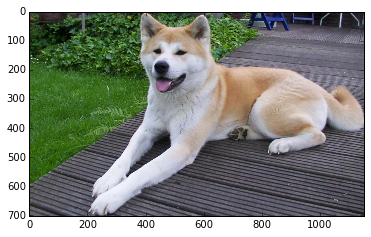

In [141]:
#Akita - There is no Akita in database
IMAGE_FILE  = '/Users/reneoctavio/caffe/examples/images/dogs/akita.jpeg'
input_image = caffe.io.load_image(IMAGE_FILE)
plt.imshow(input_image)

#Prediction
prediction = net.predict([input_image])  # predict takes any number of images, and formats them for the Caffe net automatically
pred = prediction[0]
pred = pred.argsort()[-10:][::-1]
for cls in pred:
    print(dicSyn[cls])

bloodhound, sleuthhound
bull mastiff
Great Dane
American Staffordshire terrier, Staffordshire terrier, American pit bull terrier, pit bull terrier
Rhodesian ridgeback
boxer
Staffordshire bullterrier, Staffordshire bull terrier
redbone
Labrador retriever
muzzle


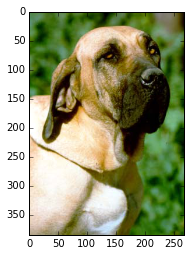

In [143]:
#Fila brasileiro/Brazilian Mastiff - Not in database
IMAGE_FILE  = '/Users/reneoctavio/caffe/examples/images/dogs/filabrasileiro.jpg'
input_image = caffe.io.load_image(IMAGE_FILE)
plt.imshow(input_image)

#Prediction
prediction = net.predict([input_image])  # predict takes any number of images, and formats them for the Caffe net automatically
pred = prediction[0]
pred = pred.argsort()[-10:][::-1]
for cls in pred:
    print(dicSyn[cls])

Saluki, gazelle hound
Weimaraner
Great Dane
Labrador retriever
whippet
Rhodesian ridgeback
borzoi, Russian wolfhound
redbone
Ibizan hound, Ibizan Podenco
bloodhound, sleuthhound


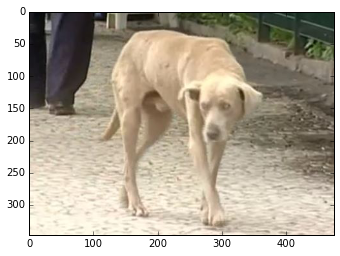

In [144]:
#Brazilian Stray Dog #1 - Not in database
IMAGE_FILE  = '/Users/reneoctavio/caffe/examples/images/dogs/brazilianstraydog1.jpg'
input_image = caffe.io.load_image(IMAGE_FILE)
plt.imshow(input_image)

#Prediction
prediction = net.predict([input_image])  # predict takes any number of images, and formats them for the Caffe net automatically
pred = prediction[0]
pred = pred.argsort()[-10:][::-1]
for cls in pred:
    print(dicSyn[cls])

dingo, warrigal, warragal, Canis dingo
Labrador retriever
Saluki, gazelle hound
American Staffordshire terrier, Staffordshire terrier, American pit bull terrier, pit bull terrier
whippet
golden retriever
Ibizan hound, Ibizan Podenco
English foxhound
Chesapeake Bay retriever
Rhodesian ridgeback


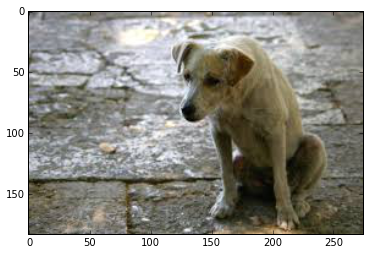

In [145]:
#Brazilian Stray Dog #2 - Not in database
IMAGE_FILE  = '/Users/reneoctavio/caffe/examples/images/dogs/brazilianstraydog2.jpeg'
input_image = caffe.io.load_image(IMAGE_FILE)
plt.imshow(input_image)

#Prediction
prediction = net.predict([input_image])  # predict takes any number of images, and formats them for the Caffe net automatically
pred = prediction[0]
pred = pred.argsort()[-10:][::-1]
for cls in pred:
    print(dicSyn[cls])

EntleBucher
black-and-tan coonhound
Doberman, Doberman pinscher
Saluki, gazelle hound
Greater Swiss Mountain dog
kelpie
Appenzeller
Rottweiler
miniature pinscher
bloodhound, sleuthhound


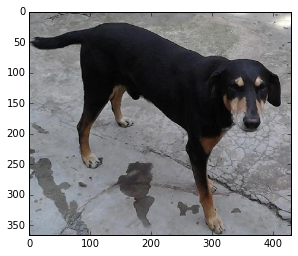

In [146]:
#Brazilian Stray Dog #3 - Not in database
IMAGE_FILE  = '/Users/reneoctavio/caffe/examples/images/dogs/brazilianstraydog3.jpg'
input_image = caffe.io.load_image(IMAGE_FILE)
plt.imshow(input_image)

#Prediction
prediction = net.predict([input_image])  # predict takes any number of images, and formats them for the Caffe net automatically
pred = prediction[0]
pred = pred.argsort()[-10:][::-1]
for cls in pred:
    print(dicSyn[cls])

# Representations of a dog
Different representations of a dog were tried to be classified in this section. 

Grayscale images does not seem to impact much the classification. Probably the pattern and shape are more important than color itself.

Also draws of dogs were tested. More details the better. Color helps but are not very important.

German shepherd, German shepherd dog, German police dog, alsatian
bloodhound, sleuthhound
Saluki, gazelle hound
bluetick
Norwegian elkhound, elkhound
Great Dane
Walker hound, Walker foxhound
English foxhound
malinois
redbone


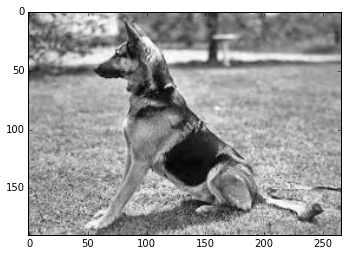

In [148]:
#German Shepherd in Grayscale
IMAGE_FILE  = '/Users/reneoctavio/caffe/examples/images/dogs/germanshepherdgrayscale.jpeg'
input_image = caffe.io.load_image(IMAGE_FILE)
plt.imshow(input_image)

#Prediction
prediction = net.predict([input_image])  # predict takes any number of images, and formats them for the Caffe net automatically
pred = prediction[0]
pred = pred.argsort()[-10:][::-1]
for cls in pred:
    print(dicSyn[cls])

kelpie
Great Dane
bluetick
American Staffordshire terrier, Staffordshire terrier, American pit bull terrier, pit bull terrier
Border collie
English setter
German short-haired pointer
English springer, English springer spaniel
Cardigan, Cardigan Welsh corgi
Boston bull, Boston terrier


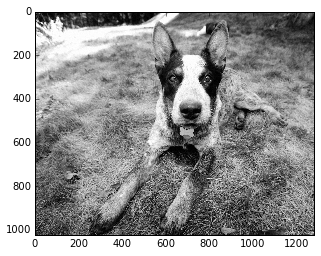

In [149]:
#Pitbull in Grayscale
IMAGE_FILE  = '/Users/reneoctavio/caffe/examples/images/dogs/pitbullgrayscale.jpg'
input_image = caffe.io.load_image(IMAGE_FILE)
plt.imshow(input_image)

#Prediction
prediction = net.predict([input_image])  # predict takes any number of images, and formats them for the Caffe net automatically
pred = prediction[0]
pred = pred.argsort()[-10:][::-1]
for cls in pred:
    print(dicSyn[cls])

schipperke
groenendael
Newfoundland, Newfoundland dog
flat-coated retriever
curly-coated retriever
Scotch terrier, Scottish terrier, Scottie
Sussex spaniel
bison
affenpinscher, monkey pinscher, monkey dog
giant schnauzer


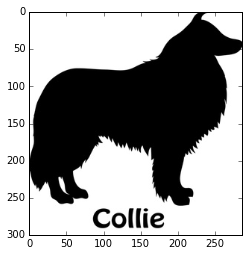

In [150]:
#Draw of a Collie #1
IMAGE_FILE  = '/Users/reneoctavio/caffe/examples/images/dogs/collieshape.jpg'
input_image = caffe.io.load_image(IMAGE_FILE)
plt.imshow(input_image)

#Prediction
prediction = net.predict([input_image])  # predict takes any number of images, and formats them for the Caffe net automatically
pred = prediction[0]
pred = pred.argsort()[-10:][::-1]
for cls in pred:
    print(dicSyn[cls])

vulture
bald eagle, American eagle, Haliaeetus leucocephalus
magpie
parachute, chute
white stork, Ciconia ciconia
cliff, drop, drop-off
stole
American black bear, black bear, Ursus americanus, Euarctos americanus
black grouse
Scotch terrier, Scottish terrier, Scottie


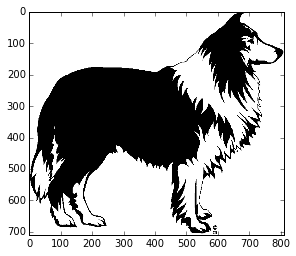

In [152]:
#Draw of a Collie #2
IMAGE_FILE  = '/Users/reneoctavio/caffe/examples/images/dogs/collietexture.png'
input_image = caffe.io.load_image(IMAGE_FILE)
plt.imshow(input_image)

#Prediction
prediction = net.predict([input_image])  # predict takes any number of images, and formats them for the Caffe net automatically
pred = prediction[0]
pred = pred.argsort()[-10:][::-1]
for cls in pred:
    print(dicSyn[cls])

collie
Shetland sheepdog, Shetland sheep dog, Shetland
borzoi, Russian wolfhound
briard
Afghan hound, Afghan
Border collie
golden retriever
Australian terrier
Saluki, gazelle hound
sorrel


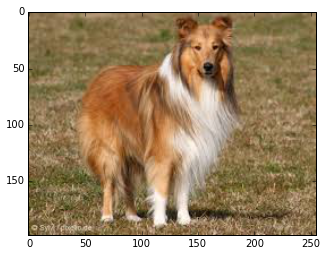

In [155]:
#Collie
IMAGE_FILE  = '/Users/reneoctavio/caffe/examples/images/dogs/collie.jpeg'
input_image = caffe.io.load_image(IMAGE_FILE)
plt.imshow(input_image)

#Prediction
prediction = net.predict([input_image])  # predict takes any number of images, and formats them for the Caffe net automatically
pred = prediction[0]
pred = pred.argsort()[-10:][::-1]
for cls in pred:
    print(dicSyn[cls])

Scottish deerhound, deerhound
collie
Afghan hound, Afghan
Irish wolfhound
borzoi, Russian wolfhound
Border collie
Shetland sheepdog, Shetland sheep dog, Shetland
English setter
groenendael
Australian terrier


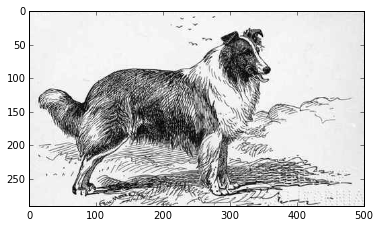

In [156]:
#Draw of a Collie #3
IMAGE_FILE  = '/Users/reneoctavio/caffe/examples/images/dogs/colliedraw.jpg'
input_image = caffe.io.load_image(IMAGE_FILE)
plt.imshow(input_image)

#Prediction
prediction = net.predict([input_image])  # predict takes any number of images, and formats them for the Caffe net automatically
pred = prediction[0]
pred = pred.argsort()[-10:][::-1]
for cls in pred:
    print(dicSyn[cls])

collie
Shetland sheepdog, Shetland sheep dog, Shetland
lion, king of beasts, Panthera leo
timber wolf, grey wolf, gray wolf, Canis lupus
Afghan hound, Afghan
Australian terrier
white wolf, Arctic wolf, Canis lupus tundrarum
Saluki, gazelle hound
borzoi, Russian wolfhound
briard


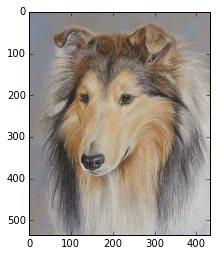

In [157]:
#Portrait of a Collie
IMAGE_FILE  = '/Users/reneoctavio/caffe/examples/images/dogs/collieportrait.jpg'
input_image = caffe.io.load_image(IMAGE_FILE)
plt.imshow(input_image)

#Prediction
prediction = net.predict([input_image])  # predict takes any number of images, and formats them for the Caffe net automatically
pred = prediction[0]
pred = pred.argsort()[-10:][::-1]
for cls in pred:
    print(dicSyn[cls])

Eskimo dog, husky
Siberian husky
malamute, malemute, Alaskan malamute
collie
white wolf, Arctic wolf, Canis lupus tundrarum
Shetland sheepdog, Shetland sheep dog, Shetland
timber wolf, grey wolf, gray wolf, Canis lupus
Arctic fox, white fox, Alopex lagopus
Australian terrier
dogsled, dog sled, dog sleigh


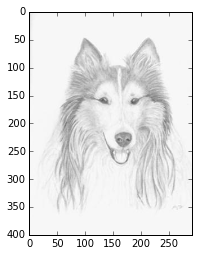

In [159]:
#Portrait of a Collie - Grayscale
IMAGE_FILE  = '/Users/reneoctavio/caffe/examples/images/dogs/collieportraitgrayscale.jpg'
input_image = caffe.io.load_image(IMAGE_FILE)
plt.imshow(input_image)

#Prediction
prediction = net.predict([input_image])  # predict takes any number of images, and formats them for the Caffe net automatically
pred = prediction[0]
pred = pred.argsort()[-10:][::-1]
for cls in pred:
    print(dicSyn[cls])

# Puppies
Some puppies were checked, and all of them were correcly classified. This means that the network is very roboust to size changes. It probably takes proportionality into account.

Siberian husky
Eskimo dog, husky
malamute, malemute, Alaskan malamute
kelpie
Norwegian elkhound, elkhound
Pembroke, Pembroke Welsh corgi
toy terrier
Cardigan, Cardigan Welsh corgi
Border collie
dogsled, dog sled, dog sleigh


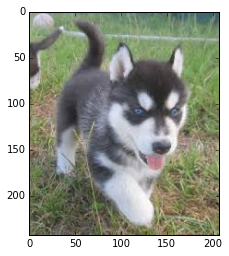

In [3]:
#Siberian Husky Puppy
IMAGE_FILE  = '/Users/reneoctavio/caffe/examples/images/dogs/siberianhuskypuppy.jpeg'
input_image = caffe.io.load_image(IMAGE_FILE)
plt.imshow(input_image)

#Prediction
prediction = net.predict([input_image])  # predict takes any number of images, and formats them for the Caffe net automatically
pred = prediction[0]
pred = pred.argsort()[-10:][::-1]
for cls in pred:
    print(dicSyn[cls])

German shepherd, German shepherd dog, German police dog, alsatian
kelpie
Norwegian elkhound, elkhound
malinois
malamute, malemute, Alaskan malamute
red wolf, maned wolf, Canis rufus, Canis niger
timber wolf, grey wolf, gray wolf, Canis lupus
bulletproof vest
Eskimo dog, husky
dingo, warrigal, warragal, Canis dingo


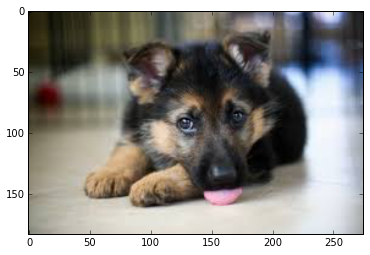

In [4]:
#German Shepherd Puppy
IMAGE_FILE  = '/Users/reneoctavio/caffe/examples/images/dogs/germanshepherdpuppy.jpeg'
input_image = caffe.io.load_image(IMAGE_FILE)
plt.imshow(input_image)

#Prediction
prediction = net.predict([input_image])  # predict takes any number of images, and formats them for the Caffe net automatically
pred = prediction[0]
pred = pred.argsort()[-10:][::-1]
for cls in pred:
    print(dicSyn[cls])

Rottweiler
Tibetan mastiff
kelpie
black-and-tan coonhound
Appenzeller
Gordon setter
Doberman, Doberman pinscher
EntleBucher
Airedale, Airedale terrier
Brabancon griffon


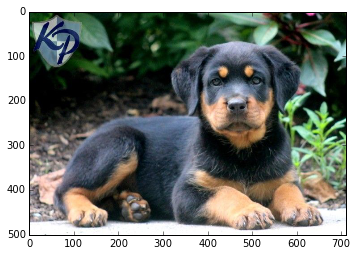

In [5]:
#Rottweiler Puppy
IMAGE_FILE  = '/Users/reneoctavio/caffe/examples/images/dogs/rottweilerpuppy.jpg'
input_image = caffe.io.load_image(IMAGE_FILE)
plt.imshow(input_image)

#Prediction
prediction = net.predict([input_image])  # predict takes any number of images, and formats them for the Caffe net automatically
pred = prediction[0]
pred = pred.argsort()[-10:][::-1]
for cls in pred:
    print(dicSyn[cls])

golden retriever
cocker spaniel, English cocker spaniel, cocker
Labrador retriever
clumber, clumber spaniel
tennis ball
English setter
Sussex spaniel
beagle
Tibetan mastiff
Brittany spaniel


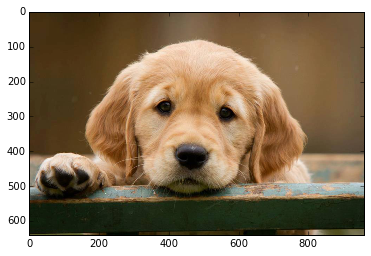

In [6]:
#Golden Retriever Puppy
IMAGE_FILE  = '/Users/reneoctavio/caffe/examples/images/dogs/goldenretrieverpuppy.jpg'
input_image = caffe.io.load_image(IMAGE_FILE)
plt.imshow(input_image)

#Prediction
prediction = net.predict([input_image])  # predict takes any number of images, and formats them for the Caffe net automatically
pred = prediction[0]
pred = pred.argsort()[-10:][::-1]
for cls in pred:
    print(dicSyn[cls])

Chihuahua
Pomeranian
Pekinese, Pekingese, Peke
toy poodle
Maltese dog, Maltese terrier, Maltese
Japanese spaniel
weasel
French bulldog
meerkat, mierkat
Egyptian cat


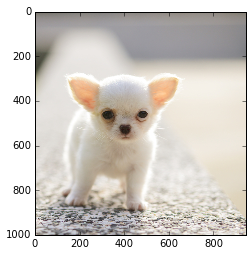

In [7]:
#Chihuahua Puppy
IMAGE_FILE  = '/Users/reneoctavio/caffe/examples/images/dogs/chihuahuapuppy.jpg'
input_image = caffe.io.load_image(IMAGE_FILE)
plt.imshow(input_image)

#Prediction
prediction = net.predict([input_image])  # predict takes any number of images, and formats them for the Caffe net automatically
pred = prediction[0]
pred = pred.argsort()[-10:][::-1]
for cls in pred:
    print(dicSyn[cls])

# Malnourished dogs
Some malnourished dogs were tested. The German Shepherd was not correctly classified, but it is in the third position.
The Siberian Husky were correcly classified. It seems that the size of the body is not very relevant.

Norwegian elkhound, elkhound
red wolf, maned wolf, Canis rufus, Canis niger
German shepherd, German shepherd dog, German police dog, alsatian
malinois
timber wolf, grey wolf, gray wolf, Canis lupus
African hunting dog, hyena dog, Cape hunting dog, Lycaon pictus
hyena, hyaena
Border terrier
kit fox, Vulpes macrotis
Irish wolfhound


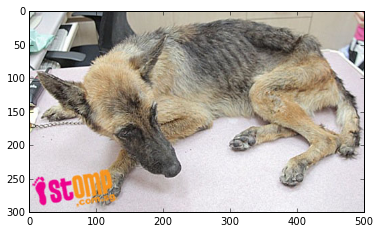

In [8]:
#German Shepherd Malnourished
IMAGE_FILE  = '/Users/reneoctavio/caffe/examples/images/dogs/germanshepherdmalnourished.jpg'
input_image = caffe.io.load_image(IMAGE_FILE)
plt.imshow(input_image)

#Prediction
prediction = net.predict([input_image])  # predict takes any number of images, and formats them for the Caffe net automatically
pred = prediction[0]
pred = pred.argsort()[-10:][::-1]
for cls in pred:
    print(dicSyn[cls])

Siberian husky
malamute, malemute, Alaskan malamute
Eskimo dog, husky
timber wolf, grey wolf, gray wolf, Canis lupus
Saluki, gazelle hound
dogsled, dog sled, dog sleigh
kelpie
collie
German shepherd, German shepherd dog, German police dog, alsatian
red wolf, maned wolf, Canis rufus, Canis niger


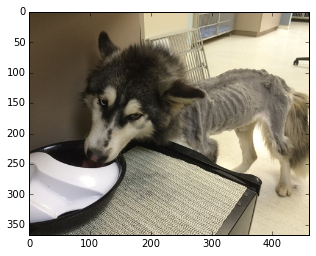

In [9]:
#Siberian Husky Malnourished
IMAGE_FILE  = '/Users/reneoctavio/caffe/examples/images/dogs/siberianhuskymalnourished.jpg'
input_image = caffe.io.load_image(IMAGE_FILE)
plt.imshow(input_image)

#Prediction
prediction = net.predict([input_image])  # predict takes any number of images, and formats them for the Caffe net automatically
pred = prediction[0]
pred = pred.argsort()[-10:][::-1]
for cls in pred:
    print(dicSyn[cls])

# Unconventional Poses
The shape and pattern of the body is as important as the face. Some of the images were not correctly classified, but its correct classification is in top 5.

Kerry blue terrier
Lakeland terrier
toy poodle
miniature poodle
standard poodle
Irish water spaniel
Bedlington terrier
Bouvier des Flandres, Bouviers des Flandres
Airedale, Airedale terrier
giant schnauzer


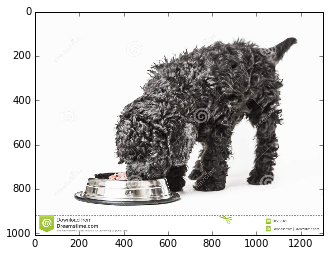

In [10]:
#Black Poodle eating
IMAGE_FILE  = '/Users/reneoctavio/caffe/examples/images/dogs/poodleblackeating.jpg'
input_image = caffe.io.load_image(IMAGE_FILE)
plt.imshow(input_image)

#Prediction
prediction = net.predict([input_image])  # predict takes any number of images, and formats them for the Caffe net automatically
pred = prediction[0]
pred = pred.argsort()[-10:][::-1]
for cls in pred:
    print(dicSyn[cls])

borzoi, Russian wolfhound
Siberian husky
Eskimo dog, husky
cougar, puma, catamount, mountain lion, painter, panther, Felis concolor
tabby, tabby cat
wire-haired fox terrier
Afghan hound, Afghan
tiger cat
lynx, catamount
Saint Bernard, St Bernard


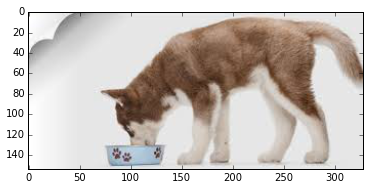

In [11]:
#Siberian Husky eating
IMAGE_FILE  = '/Users/reneoctavio/caffe/examples/images/dogs/siberianhuskyeating.jpeg'
input_image = caffe.io.load_image(IMAGE_FILE)
plt.imshow(input_image)

#Prediction
prediction = net.predict([input_image])  # predict takes any number of images, and formats them for the Caffe net automatically
pred = prediction[0]
pred = pred.argsort()[-10:][::-1]
for cls in pred:
    print(dicSyn[cls])

African hunting dog, hyena dog, Cape hunting dog, Lycaon pictus
German shepherd, German shepherd dog, German police dog, alsatian
ox
kelpie
malinois
Norwegian elkhound, elkhound
Airedale, Airedale terrier
gibbon, Hylobates lar
Leonberg
Border terrier


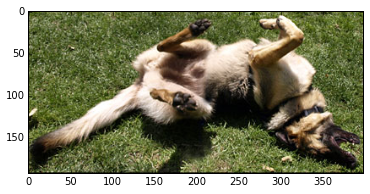

In [12]:
#German Shepherd rolling
IMAGE_FILE  = '/Users/reneoctavio/caffe/examples/images/dogs/germanshepherdrolling.jpg'
input_image = caffe.io.load_image(IMAGE_FILE)
plt.imshow(input_image)

#Prediction
prediction = net.predict([input_image])  # predict takes any number of images, and formats them for the Caffe net automatically
pred = prediction[0]
pred = pred.argsort()[-10:][::-1]
for cls in pred:
    print(dicSyn[cls])

German shepherd, German shepherd dog, German police dog, alsatian
Rottweiler
Airedale, Airedale terrier
Border terrier
kelpie
muzzle
Appenzeller
bloodhound, sleuthhound
otterhound, otter hound
beagle


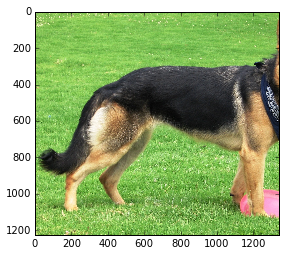

In [13]:
#German Shepherd no face
IMAGE_FILE  = '/Users/reneoctavio/caffe/examples/images/dogs/germanshepherdnoface.png'
input_image = caffe.io.load_image(IMAGE_FILE)
plt.imshow(input_image)

#Prediction
prediction = net.predict([input_image])  # predict takes any number of images, and formats them for the Caffe net automatically
pred = prediction[0]
pred = pred.argsort()[-10:][::-1]
for cls in pred:
    print(dicSyn[cls])

# Conclusion
The network is still not very efficient in separating very similar breeds, however it is good at classifing a dog into breeds that are similiar. So it might be possible to say whether a dog belongs to a particular family of breeds instead of a specific breed.